In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [4]:
#Data from: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
#Read in data from csv
rest_data = pd.read_csv('/Users/mallorysico/Desktop/ProbabilityAndStatistics_1002/Project/zomato.csv')

In [111]:
#Show data
rest_data.head()

,url,address,name,"online_order(N = 0, Y=1)","book_table(N = 0, Y=1)",rate,votes,"phone(L = 0, P=1)",location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),price_range
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,$$$
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,$$$
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,$$$
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,$$
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,1,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,$$$


In [14]:
#Remove duplicates and null values in relevant columns
#Delete duplicates
rest_data = rest_data.drop_duplicates('url')

#Drop menu items 
rest_data.drop('menu_item',axis=1,inplace=True)

#Drop null values in relevant columns
rest_data.dropna(subset=['rate','location','rest_type','cuisines','approx_cost(for two people)'],inplace=True)

In [15]:
#Check number of null values in relevant columns
#21 null values in location column 
rest_data['location'].isna().sum()

#227 null in rest_type
rest_data['rest_type'].isna().sum()

#20252 null in dish_liked, 28078 null values in dish_liked column without removing any others
rest_data['dish_liked'].isna().sum()

#11 null in dish_liked, 45 null values in dish_liked column without removing any others
rest_data['cuisines'].isna().sum()

#11 null, 45 null values in column without removing any others
rest_data['cuisines'].isna().sum()

#247 null, 346 null values column without removing any others
rest_data['approx_cost(for two people)'].isna().sum()

#0 null, 0 null values column without removing any others
rest_data['reviews_list'].isna().sum()

#10052 null values in the rate column
rest_data['rate'].isna().sum()

#0 null, 0 null values column without removing any others
rest_data['listed_in(type)'].isna().sum()

0

In [8]:
#Remove commas from the numbers in the approx_cost
rest_data['approx_cost(for two people)'] = rest_data['approx_cost(for two people)'].str.replace(',', '')

#Change column to integers
rest_data['approx_cost(for two people)'] = rest_data['approx_cost(for two people)'].astype('Int64')

In [10]:
#Update rate column to numeric: keep only the rating and convert to float (remove the '/5' for each entry)
rest_data['rate'] = rest_data['rate'].astype('str')

#Split string by '/'
rest_data['rate'] = rest_data['rate'].str.split('/').str[0]

#Convert to float
rest_data['rate'] = pd.to_numeric(rest_data['rate'], errors = 'coerce')
rest_data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [24]:
#Create flags for phone number column
#Change phone number to string to split
rest_data['phone'] = rest_data['phone'].astype('str')

#Split by the space in phone numbers
rest_data['phone'] = rest_data['phone'].str.split(' ').str[0]

#Create flag for data
rest_data.loc[rest_data['phone'] == '080', 'phone'] = 'Landline'
rest_data.loc[rest_data['phone'] == '+91', 'phone'] = 'Personal'
rest_data['phone'] 

0        080
1        080
2        +91
3        +91
4        +91
        ... 
51709    +91
51711    080
51712    080
51715    080
51716    +91
Name: phone, Length: 41263, dtype: object

/Users/mallorysico/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Ratings for All Restaurants')

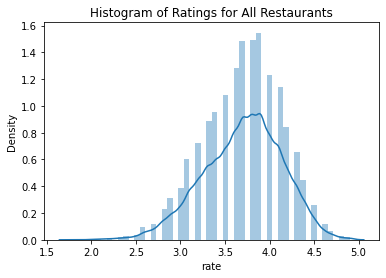

In [108]:
#Display the distribution of the ratings
sns.distplot(rest_data['rate'])
plt.title('Histogram of Ratings for All Restaurants')

Histogram shows that the ratings have an almost normal distribution with a mean close to 3.7.

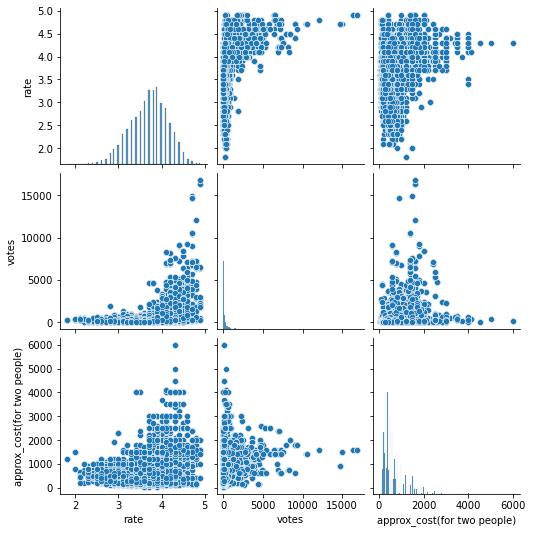

In [49]:
#High level view of numerical column correlations
sns.pairplot(data = rest_data)

## Hypothesis from above plot: 
Votes and ratings: Lower ratings have less votes because once a place has low ratings, less people will go to that restaurant. 

Votes and cost: There are more votes for lower cost restaurants

Ratings and cost: Rating goes up for higher cost restaurants 

<AxesSubplot:xlabel='rate', ylabel='votes'>

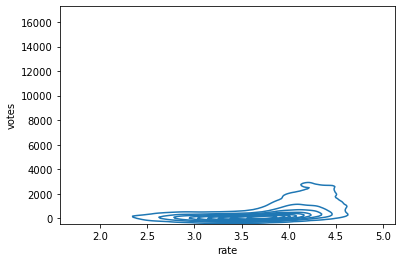

In [55]:
#Contour plots for rate vs votes
sns.kdeplot(x = rest_data['rate'], y = rest_data['votes'], data = rest_data)

This contour plot indicates some higher votes when the rating is higher. 

<AxesSubplot:xlabel='votes', ylabel='approx_cost(for two people)'>

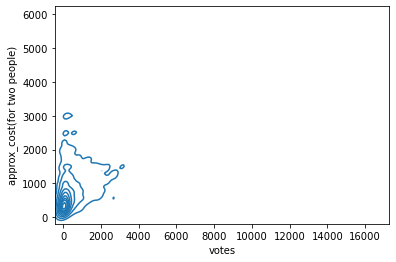

In [56]:
#Contour plots for votes vs cost
sns.kdeplot(x = rest_data['votes'], y = rest_data['approx_cost(for two people)'], data = rest_data)

This contour plot indicates a lack of spread of the data. 

Text(0.5, 1.0, 'Kernel Density Contour Plot of Rate vs. Cost Per Person')

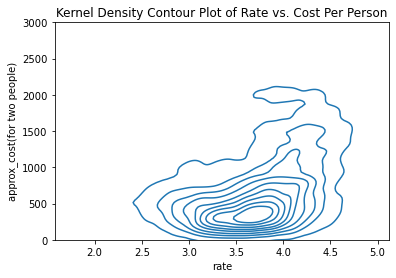

In [110]:
#Contour plots for rate vs cost
sns.kdeplot(x = rest_data['rate'], y = rest_data['approx_cost(for two people)'], data = rest_data)
plt.ylim(0, 3000)
plt.title('Kernel Density Contour Plot of Rate vs. Cost Per Person')

This contour plot indicates a positive correlation between the rate and the approximate cost per person. 

In [112]:
#Change online order, book_table and phone to binary numeric identifiers
rest_data.loc[rest_data['phone'] == 'Landline', 'phone'] = 0 
rest_data.loc[rest_data['phone'] == 'Personal', 'phone'] = 1 
rest_data = rest_data.rename(columns = {'phone': 'phone(L = 0, P=1)'})

rest_data.loc[rest_data['online_order'] == 'No', 'online_order'] = 0
rest_data.loc[rest_data['online_order'] == 'Yes', 'online_order'] = 1
rest_data = rest_data.rename(columns = {'online_order': 'online_order(N = 0, Y=1)'})

rest_data.loc[rest_data['book_table'] == 'No', 'book_table'] = 0 
rest_data.loc[rest_data['book_table'] == 'Yes', 'book_table'] = 1
rest_data = rest_data.rename(columns = {'book_table': 'book_table(N = 0, Y=1)'})

rest_data.head()

,url,address,name,"online_order(N = 0, Y=1)","book_table(N = 0, Y=1)",rate,votes,"phone(L = 0, P=1)",location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),price_range
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,$$$
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,$$$
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,$$$
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,$$
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,1,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,$$$


(array([3.2149e+04, 3.7680e+03, 1.7490e+03, 9.7100e+02, 5.1000e+02,
        5.4700e+02, 3.5500e+02, 2.2500e+02, 2.0600e+02, 1.0200e+02,
        1.2900e+02, 1.0500e+02, 4.3000e+01, 1.1000e+02, 6.6000e+01,
        2.0000e+01, 5.0000e+00, 1.0000e+01, 1.6000e+01, 1.1000e+01,
        2.7000e+01, 3.7000e+01, 1.1000e+01, 1.0000e+01, 1.5000e+01,
        1.0000e+00, 2.3000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([    0.  ,   336.64,   673.28,  1009.92,  1346.56,  1683.2 ,
         2019.84,  2356.48,  2693.12,  3029.76,  3366.4 ,  3703.04,
         4039.68,  4376.32,  4712.96,  5049.6 ,  5386.24,  5722.88,
         6059.52,  6396.16,  6732.8 ,  7069.44,  7406.08,  7742.72,
         8079.36,  8416.  ,  8752.64,  9089.28

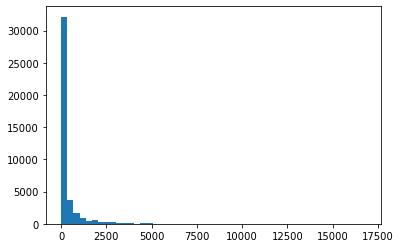

In [73]:
#Plot histogram of votes for all restaurants
plt.hist(rest_data['votes'], bins = 50)


This histogram shows that the votes are highly skewed towards the low end. More than 50% of the data has fewer than 50 votes. 

(array([  40.,  121.,  426., 1041.,  963., 1907., 7432., 7790., 3465.,
         588.]),
 array([1.8 , 2.11, 2.42, 2.73, 3.04, 3.35, 3.66, 3.97, 4.28, 4.59, 4.9 ]),
 <BarContainer object of 10 artists>)

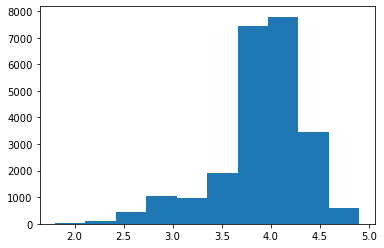

In [76]:
#Plot distribution of ratings for restaurants that have more than 50 votes
plt.hist(rest_data['rate'].loc[rest_data['votes'] > 50])


The restaurants that have more than 50 votes have most ratings above 3.7. 

(array([  22.,  115.,  315., 2274., 3518., 4274., 5696.,  947.,  148.,
          19.]),
 array([2.2 , 2.43, 2.66, 2.89, 3.12, 3.35, 3.58, 3.81, 4.04, 4.27, 4.5 ]),
 <BarContainer object of 10 artists>)

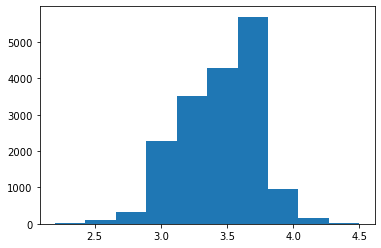

In [77]:
#Plot distribution of ratings for restaurants that have fewer than 50 votes
plt.hist(rest_data['rate'].loc[rest_data['votes'] < 50])

The restaurants that have fewer than 50 votes have most ratings distributed between 3 and 3.7. 

In [104]:
#Check amount of values in each of the ranges of restaurant type
#Budget: 7825
len(rest_data.loc[rest_data['approx_cost(for two people)'] <= 250])

#Mid-low: 17177
len(rest_data.loc[(rest_data['approx_cost(for two people)'] > 250) & (rest_data['approx_cost(for two people)'] <= 500)])

#Mid-high: 11666
len(rest_data.loc[(rest_data['approx_cost(for two people)'] > 500) & (rest_data['approx_cost(for two people)'] <= 1000)])

#High: 5135
len(rest_data.loc[rest_data['approx_cost(for two people)'] > 1000])


5135

In [107]:
#Create a new column to discretize the price range into 4 buckets
rest_data['price_range'] = 0
rest_data.loc[rest_data['approx_cost(for two people)'] <= 250, 'price_range'] = '$'
rest_data.loc[(rest_data['approx_cost(for two people)'] >= 250) & (rest_data['approx_cost(for two people)'] < 500), 'price_range'] = '$$'
rest_data.loc[(rest_data['approx_cost(for two people)'] >= 500) & (rest_data['approx_cost(for two people)'] < 1000), 'price_range'] = '$$$'
rest_data.loc[rest_data['approx_cost(for two people)'] >= 1000, 'price_range'] = '$$$$'
rest_data

,url,address,name,"online_order(N = 0, Y=1)","book_table(N = 0, Y=1)",rate,votes,"phone(L = 0, P=1)",location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),price_range
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,$$$
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,$$$
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,$$$
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,$$
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,1,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,$$$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,0,0,3.7,34,1,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,$$$
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,0,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,$$$
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,0,Whitefield,Bar,NaN,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,$$$$
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,0,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,$$$$
